# WeRateDogs Wrangle Project
By Abdelrahman Mohsen

# Table of contents
- [Gathering Process](#gath)
- [Assessing Process](#asses)
    - [Quality issues](#q-s)
    - [Tidiness issues](#t-s)
- [Cleaning Process ](#clean)
- [Analysis and Visualization ](#visu)

## Gathering Process
<a id="gath"></a>
In this process we will gather data from three sources(csv file - tsv file - twitter API) creating dataframes
that are ready for assessing and cleaning steps.
We will do so in three steps:
1. Read the csv file and make dataframe for it
2. Download the image predictions file programmatically through requests then creat its dataframe
3. Creat a text file with useful data retrieved from tweepy API then read this text file line by line to creat dataframe

###### Input:
- twitter_archive_enhanced.csv
- image_predictions.tsv
- Data from twitter API

###### Output:
- DataFrame for twitter archive data
- DataFrame for image prediction data
- DataFrame for twitter API data
- Tweet_json.txt
- image-predictions.tsv

In [ ]:
#import required modules
import pandas as pd
import numpy as np
import re
import requests
import tweepy
from tweepy import OAuthHandler
from timeit import default_timer as timer
import os
import json
import datetime
import matplotlib.pyplot as plt

%matplotlib inline

#set options to show all dataframe rows for visual assessment
pd.set_option('display.max_colwidth', -1)
pd.set_option("display.max_rows", None, "display.max_columns", None) 

In [ ]:
#Create a dataframe form csv file
archive_df = pd.read_csv('twitter-archive-enhanced.csv')

In [49]:
#download image predictions data from a URL using requests
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv' 

#get the file name from the url
file_name = url.split('/')[-1]

#use requests to download the file
response = requests.get(url)
if not os.path.isfile(file_name):
    with open(file_name,'wb') as file:
        file.write(response.content)
        
#read the created tsv file and load its data to a dataframe   
img_df = pd.read_csv(file_name, sep='\t')

In [ ]:
# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions
consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

# NOTE TO STUDENT WITH MOBILE VERIFICATION ISSUES:
# df_1 is a DataFrame with the twitter_archive_enhanced.csv file. You may have to
# change line 17 to match the name of your DataFrame with twitter_archive_enhanced.csv
# NOTE TO REVIEWER: this student had mobile verification issues so the following
# Twitter API code was sent to this student from a Udacity instructor
# Tweet IDs for which to gather additional data via Twitter's API
tweet_ids = archive_df.tweet_id.values
len(tweet_ids)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()

# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)

In [50]:
#extract data from the file we created using twitter API to put in a dataframe
df_list = []

#open tweet-jason.txt file
with open('tweet-json.txt', 'r') as file:
    #read every line in the file
    for line in file:
        tweet = json.loads(line)
        tweet_id = tweet['id']
        retweet_count = tweet['retweet_count']
        fav_count = tweet['favorite_count']
        
        # Append to list of dictionaries
        df_list.append({'tweet_id':tweet_id,
                       'retweet_count': retweet_count,
                       'favorite_count': fav_count})
        
api_df = pd.DataFrame(df_list)

## Assessing Process
<a id="asses"></a>
In this process we will assess the dataframes we created above visually and programmatically for quality and tidiness issues.
We will extract eight (8) quality issues and two (2) tidiness issues


As we can see from the visual and programtic assessment below we can summary the issues in our data:

### Quality issues
<a id="q-s"></a>
#### archive dataframe

- source column need to be cleaned from tags and url taht not related 
- date and time need to be in datetime object
- drop rows with no images
- drop replies tweets 
- drop retweets
- change None values in doggo, floofer,	pupper and puppo columns to empty string
- rating numerator column must be float
- correct wrong values of rating_numerator and rating_denominator




### Tidiness issues
<a id="t-s"></a>
#### archive dataframe
- doggo, floofer, pupper and puppo need to be one column


#### image predictions dataframe
- merging image prediction dataframe with archive dataframe 

In [51]:
#visualize twitter archive df
archive_df.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,None,None,None,None


In [52]:
#get a look at archive dataframe summary
archive_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [53]:
# show how many not Nan values in the last four columns 
(archive_df.loc[:, 'doggo':"puppo"] != 'None') .sum()

doggo      97 
floofer    10 
pupper     257
puppo      30 
dtype: int64

In [54]:
#get a look at outbounded rates
archive_df[archive_df.rating_denominator > 10]
print(archive_df[archive_df.rating_denominator > 10].shape)

(20, 17)


In [55]:
#visualize image prediction df 
img_df.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [56]:
#get a look at image prediction dataframe summary
img_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [57]:
#visualize image prediction df 
api_df.head()

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048


In [58]:
#get a look at image prediction dataframe summary
api_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   tweet_id        2354 non-null   int64
 1   retweet_count   2354 non-null   int64
 2   favorite_count  2354 non-null   int64
dtypes: int64(3)
memory usage: 55.3 KB


## Cleaning Process
<a id="clean"></a>
With the issues in the assessment process we are going to fix them to finally get clean dataframes 

In [59]:
#copy dataframes to be ready to clean them
arch_clean = archive_df.copy()
img_clean = img_df.copy()

##### Define
Remove tags and unnecessary data in source column
- split the value by separator '>' then extract the right info by slicing 

##### Code

In [60]:
#remove html tags from source column 
arch_clean['source'] = arch_clean['source'].apply(lambda x:x.split('>')[1][:-3]) 

##### Test

In [61]:
arch_clean['source'].head()

0    Twitter for iPhone
1    Twitter for iPhone
2    Twitter for iPhone
3    Twitter for iPhone
4    Twitter for iPhone
Name: source, dtype: object

##### Define
Split timestamp column into date and time columns
- convert timestamp column to datetime object 

##### Code

In [62]:
#change timestamp column type to be datetime object  
arch_clean['timestamp']=pd.to_datetime(arch_clean['timestamp'])

##### Test

In [63]:
arch_clean['timestamp'].head()

0   2017-08-01 16:23:56+00:00
1   2017-08-01 00:17:27+00:00
2   2017-07-31 00:18:03+00:00
3   2017-07-30 15:58:51+00:00
4   2017-07-29 16:00:24+00:00
Name: timestamp, dtype: datetime64[ns, UTC]

##### Define
Remove rows that are replies, retweet or have no images 
- filter the archive df by image df
- drop all rows that have value in 'in_reply_to_status_id'
- drop all rows that have value in 'retweeted_status_id'
- drop all columns that have retweet or replies info

##### Code

In [64]:
#remove rows with no images
tw_img = list(img_clean.tweet_id.unique())
arch_clean = arch_clean[arch_clean.tweet_id.isin(tw_img)]

#remove replies and retweets
arch_clean = arch_clean[arch_clean.in_reply_to_status_id.isnull()]
arch_clean = arch_clean[arch_clean.retweeted_status_id.isnull()]


In [65]:
#remove columns with no data in archive data frame
arch_clean.drop(['retweeted_status_id','retweeted_status_user_id','retweeted_status_timestamp'], axis = 1,inplace=True)
arch_clean.drop(['in_reply_to_status_id','in_reply_to_user_id'], axis = 1,inplace=True)

##### Test

In [66]:
arch_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1971 entries, 0 to 2355
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            1971 non-null   int64              
 1   timestamp           1971 non-null   datetime64[ns, UTC]
 2   source              1971 non-null   object             
 3   text                1971 non-null   object             
 4   expanded_urls       1971 non-null   object             
 5   rating_numerator    1971 non-null   int64              
 6   rating_denominator  1971 non-null   int64              
 7   name                1971 non-null   object             
 8   doggo               1971 non-null   object             
 9   floofer             1971 non-null   object             
 10  pupper              1971 non-null   object             
 11  puppo               1971 non-null   object             
dtypes: datetime64[ns, UTC](1), int64(3

##### Define
Compine doggo, floofer, pupper and puppo columns to one column
- change None values to empty string
- make one column using '+' operator
- drop old columns
- replace empty string with NaN 
- seperate compined stages by '-'

##### Code

In [67]:
#change None values in doggo, floofer, pupper and puppo columns to empty string
arch_clean['doggo'].replace({"None": ""}, inplace=True)
arch_clean['floofer'].replace({"None": ""}, inplace=True)
arch_clean['pupper'].replace({"None": ""}, inplace=True)
arch_clean['puppo'].replace({"None": ""}, inplace=True)

#make one column for doggo, floofer, pupper and puppo columns
arch_clean['dog_breed'] = arch_clean['doggo'] + arch_clean['floofer'] + arch_clean['pupper'] + arch_clean['puppo']

#drop old columns
arch_clean.drop(['doggo','floofer', 'pupper', 'puppo'], axis=1,inplace=True)

#replace empty values with NaN
arch_clean['dog_breed'].replace({"": np.nan}, inplace=True)

#seperate mixed stages
arch_clean.loc[arch_clean.dog_breed=='doggopupper','dog_breed']='doggo-pupper'
arch_clean.loc[arch_clean.dog_breed=='doggopuppo','dog_breed']='doggo-puppo'
arch_clean.loc[arch_clean.dog_breed=='doggofloofer','dog_breed']='doggo-floofer'

##### Test

In [68]:
arch_clean.info()
arch_clean['dog_breed'].value_counts()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1971 entries, 0 to 2355
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            1971 non-null   int64              
 1   timestamp           1971 non-null   datetime64[ns, UTC]
 2   source              1971 non-null   object             
 3   text                1971 non-null   object             
 4   expanded_urls       1971 non-null   object             
 5   rating_numerator    1971 non-null   int64              
 6   rating_denominator  1971 non-null   int64              
 7   name                1971 non-null   object             
 8   dog_breed           303 non-null    object             
dtypes: datetime64[ns, UTC](1), int64(3), object(5)
memory usage: 154.0+ KB


pupper           201
doggo            63 
puppo            22 
doggo-pupper     8  
floofer          7  
doggo-floofer    1  
doggo-puppo      1  
Name: dog_breed, dtype: int64

##### Define
Change the names of image prediction df
- make list with new names
- assign the list to the df

##### Code

In [69]:
#renaming the dataset columns
cols = ['tweet_id', 'jpg_url', 'img_num', 
       'prediction_1', 'confidence_1', 'breed_1',
       'prediction_2', 'confidence_2', 'breed_2',
       'prediction_3', 'confidence_3', 'breed_3']
img_clean.columns = cols

##### Test

In [70]:
img_clean.head()

,tweet_id,jpg_url,img_num,prediction_1,confidence_1,breed_1,prediction_2,confidence_2,breed_2,prediction_3,confidence_3,breed_3
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


##### Define
Correct wrong values of rating_numerator and rating_denominator
- write the pattern to extract rates from text using regex
- get the right rate from the extracted values
- get the no. of dogs for rates > 10
- get the right rate for one dog
- investigate suspicious rates for manual tweaking

##### Code

In [71]:
# fix rating_dominator with wrong extracted rate
pattern = re.compile('(\d+\.?\d?\d?)\/(\d{1,3})')
test = arch_clean.text.str.findall(pattern)
arch_clean['rating_denominator'] = test.apply(lambda x: x[1][1] if len(x)>1 else x[0][1]).astype(int)

# fix rating_numerator with wrong extracted rate
arch_clean['rating_numerator'] = test.apply(lambda x: x[1][0] if len(x)>1 else x[0][0]).astype(float)

# fix rating_dominator that include more than one dog
dog_no = arch_clean.rating_denominator.apply(lambda x: x/10)
arch_clean.rating_denominator = arch_clean.rating_denominator/dog_no

# fix rating_numerator that include more than one dog
arch_clean.rating_numerator = arch_clean.rating_numerator/dog_no

In [72]:
#more investigation to outliers
arch_clean[arch_clean.rating_numerator==420]
arch_clean[arch_clean.rating_numerator==0]

#drop row 2074, 765, 883, 912, 2305, 2310, 2316 as it's not a dog
arch_clean.drop(2074,axis=0,inplace=True)
arch_clean.drop(765,axis=0,inplace=True)
arch_clean.drop(883,axis=0,inplace=True)
arch_clean.drop(912,axis=0,inplace=True)
arch_clean.drop(2305,axis=0,inplace=True)
arch_clean.drop(2310,axis=0,inplace=True)
arch_clean.drop(2316,axis=0,inplace=True)

#fix the row with rate 0 as it's not the right rate the right rate is 11
arch_clean.loc[315,'rating_numerator'] = 11
arch_clean.loc[2216,'rating_numerator'] = 8
arch_clean.loc[1359,'rating_numerator'] = 9

#drop rates under 2
arch_clean = arch_clean.drop(arch_clean[arch_clean['rating_numerator']<=2].index)

##### Test

In [73]:
arch_clean[['text','rating_numerator','rating_denominator']].head()

,text,rating_numerator,rating_denominator
0,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,13.0,10.0
1,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",13.0,10.0
2,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,12.0,10.0
3,This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,13.0,10.0
4,"This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",12.0,10.0


In [74]:
arch_clean.rating_numerator.value_counts()

12.000000      449
10.000000      411
11.000000      399
13.000000      255
9.000000       151
8.000000       99 
7.000000       54 
14.000000      34 
6.000000       33 
5.000000       31 
3.000000       17 
4.000000       13 
9.750000       1  
11.270000      1  
13.500000      1  
34.285714      1  
11.260000      1  
1776.000000    1  
Name: rating_numerator, dtype: int64

In [75]:
arch_clean.rating_denominator.value_counts()

10.0    1952
Name: rating_denominator, dtype: int64

##### Define
Merge all dataframes to one dataframe
- filter api df and img df by archive df 'tweet_id'
- merge dataframes on 'tweet_id'
- save the new dataframe to csv file

##### Code

In [76]:
# make image prediction and api dataframe to have the same row as archive dataframe 
img_clean = img_clean[img_clean.tweet_id.isin(list(arch_clean.tweet_id.unique()))]
api_df = api_df[api_df.tweet_id.isin(list(arch_clean.tweet_id.unique()))]

# merge image prediction and archive dataframes
twitter_archive_master = pd.merge(arch_clean, img_clean, on='tweet_id')
twitter_archive_master = pd.merge(twitter_archive_master, api_df, on='tweet_id')

#save the final dataframes to csv file
twitter_archive_master.to_csv('twitter_archive_master.csv',index=False)

##### Test

In [77]:
twitter_archive_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1952 entries, 0 to 1951
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            1952 non-null   int64              
 1   timestamp           1952 non-null   datetime64[ns, UTC]
 2   source              1952 non-null   object             
 3   text                1952 non-null   object             
 4   expanded_urls       1952 non-null   object             
 5   rating_numerator    1952 non-null   float64            
 6   rating_denominator  1952 non-null   float64            
 7   name                1952 non-null   object             
 8   dog_breed           303 non-null    object             
 9   jpg_url             1952 non-null   object             
 10  img_num             1952 non-null   int64              
 11  prediction_1        1952 non-null   object             
 12  confidence_1        1952 non-null 

# Data analysis and visulization
Finally we came to the last part of the project and the most useful one where we get insights and information that we will lead our thoughts.

First i think it's important get more info about WeRateDogs, is the account active and posts periodically?
what about interactions on these posts? 

As an animal lover but has no knowledge about dog i'm interested to know in such community of dog lovers what is the most common dog breed between them and do that dog breed get high rating or interactions?
on the other side there are dog stage..which stage people prefer most?

Let summarize to specific questions to be more clear.
we will answer the following questions:
1. What's rate of account posts over time?
2. Are engagements with posts increase over time? 
3. What the most common dog breed appeared in tweets?
4. Which breed got most intractions?
5. Which breed got most retweets?
6. Which dog stage has more ratings?

### 1. What's rate of account posts over time?

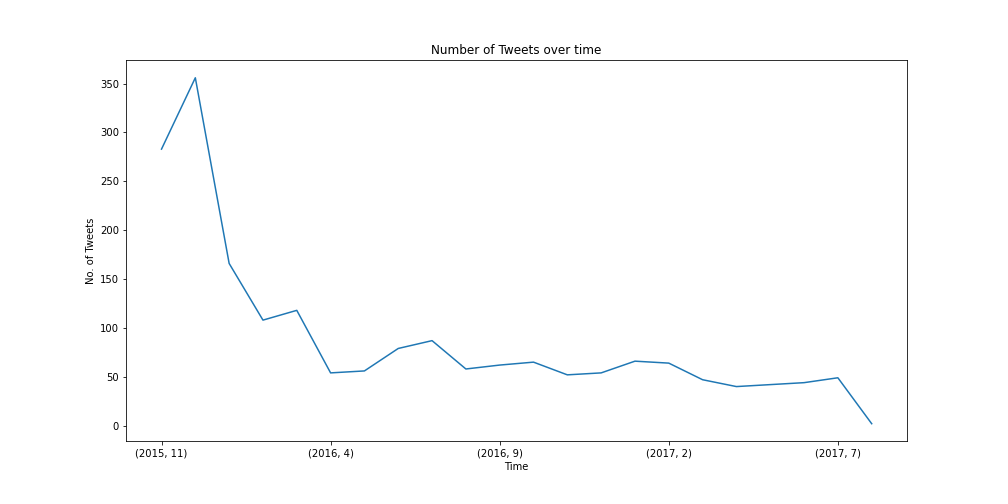

### 2. Do engagements with posts increase over time?

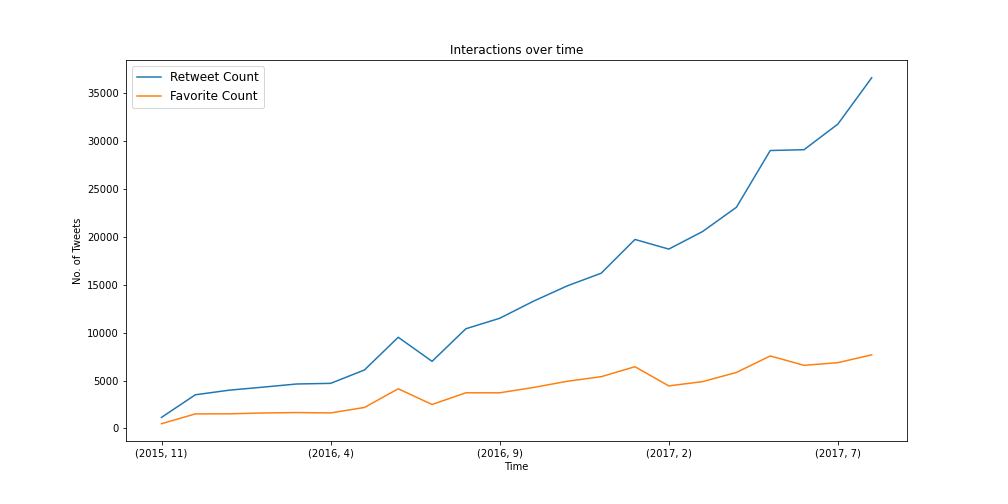

Interesting..interactions increase despite number of post on the account decrease over time.
I think it might indicate high quality of posts. 

### 3. what the most common dog breed appeared in tweets?

```
golden_retriever      137
Labrador_retriever     94
Pembroke               88
Chihuahua              78
pug                    54
                     ... 
loupe                   1
trombone                1
school_bus              1
espresso                1
starfish                1
Name: prediction_1, Length: 365, dtype: int64
```

 Golden retriever is the most common dog breed and Labrador retrieveris the second most common breed .. let's get more insights  about dog breeds.

### 4. Which breed got most intractions?

```
        prediction_1	favorite_count
306	 Lakeland_terrier       132810
766	 Labrador_retriever	 131075
58	  English_springer	   107956
397	 Chihuahua	          107015
108     French_bulldog	     106827
...	...	...
1941	Gordon_setter	154
1924	toy_terrier	129
1925	black-and-tan_coonhound	113
1935	desktop_computer	108
1918	curly-coated_retriever	107
```

Lakeland terrier is the most breed that got interactions

### 5. Which breed got most retweets?

```
     prediction_1	retweet_count
766	 Labrador_retriever	79515
397	 Chihuahua       	56625
801 	Eskimo_dog      	52360
306 	Lakeland_terrier	48265
58  	English_springer	45849
...	...	...
1924	toy_terrier      	48
1819	crash_helmet    	45
1925	black-and-tan_coonhound	44
1935	desktop_computer	37
1918	curly-coated_retriever	23
```

Labrador retriever got more retweets than others
Despite  Golden retriever appears more in tweets the interactions on its images not event in the top five!
Labrador retriever is in a good poistion in both popularity in posts and interactions!

### 6. Which dog stage has more ratings ?

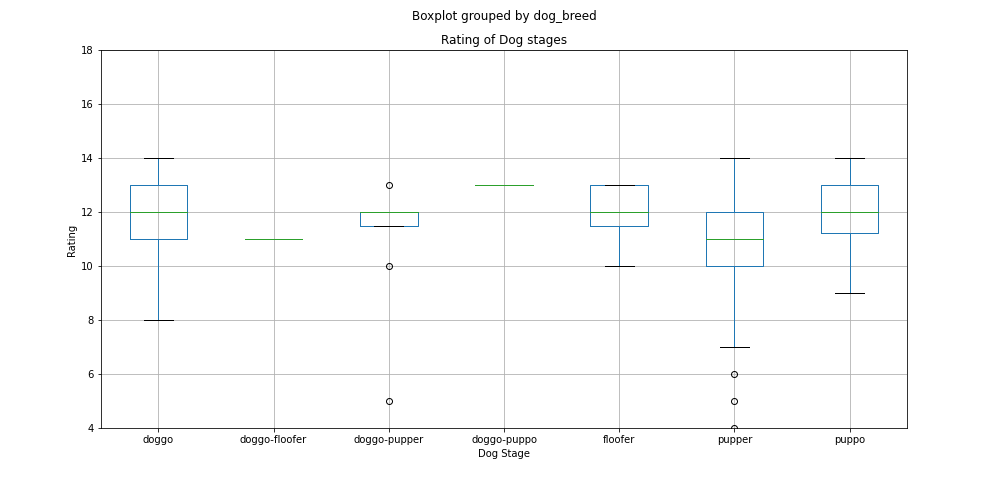

Doggo stage has more ratings than other stages..it seems like people perfer doggo on other stages.

### Conclusion
We go through all steps to analyse the data,other work in cleaning and visualization processes can be done on the data and these insights can inspire others to more investigations and more accurate results.